<a href="https://colab.research.google.com/github/Alex-Zeo/network-analysis/blob/main/Mine_Translate_Telegram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telegram Message Miner (define date range)**

In [ ]:
#mines telegram messages for given daterange
import pandas as pd
import time
from datetime import datetime
from pytz import utc
from tqdm import tqdm
from telethon.sync import TelegramClient
from telethon.errors.rpcerrorlist import FloodWaitError

#config
api_id = 'yourapiid'
api_hash = 'yourapihash'
phone_number = 'yourphonehere'
start_date = datetime(2023, 9, 1, tzinfo=utc)
end_date = datetime(2023, 9, 30, tzinfo=utc)

# List of channels to mine
channels = ['@ab3army',
            '@AFUStratCom',
            '@agurulev',
            '@akashevarova',
            '@aleksandr_skif',
            '@andriyshTime',
            '@annamaliar',
            '@astrapress',
            '@ASupersharij',
            '@babchenko77',
            '@BattleSailor13',
            '@Bayraktar_News_UA',
            '@bmrada',
            '@boris_rozhin',
            '@boryslavrada',
            '@brussinf',
            '@brygada47',
            '@ButusovPlus',
            '@CinCAFU',
            '@concordgroup_official',
            '@Damhistory',
            '@DCSpeaker',
            '@DIUkraine',
            '@DmitriySteshin',
            '@dnepr_operativ',
            '@dnipropetrovskaODA',
            '@dnronline',
            '@dshrg2',
            '@dva_majors',
            '@epoddubny',
            '@EurointegrationComUA',
            '@geromanat',
            '@GrafinyaNegoduet',
            '@grey_zone',
            '@gruz_200_rus',
            '@guildhall',
            '@i20028843',
            '@igor_korotchenko',
            '@infofakt_ua',
            '@insiderUKR',
            '@intelslava',
            '@ioannZH',
            '@itarmyofukraine2022',
            '@ivankivINFO',
            '@kaagranovich',
            '@kharkivoda',
            '@khersonskaODA',
            '@kievoperativ',
            '@KIMMARINA',
            '@kolomyiagov',
            '@kurtievofficial',
            '@KyivCityOfficial',
            '@kyivindependent',
            '@kyivoda',
            '@Kyivpost_official',
            '@landforcesofukraine',
            '@LastBP',
            '@legitimniy',
            '@liganet',
            '@liveukraine_media',
            '@logikamarkova',
            '@lutskradanews',
            '@lvivmediacenter',
            '@Mestb_Dobroj_Voli',
            '@milinfolive',
            '@mod_russia',
            '@montyan2',
            '@mykolaivskaODA',
            '@news_kremlin_eng',
            '@niklive',
            '@noel_reports',
            '@Novoeizdanie',
            '@novynylive',
            '@O_Arestovich_official',
            '@odeskaODA',
            '@ok_spn',
            '@oleksandrmamay',
            '@oleksiihoncharenko',
            '@operativnoZSU',
            '@our_odessa',
            '@pavlokyrylenko_donoda',
            '@pilotblog',
            '@polkazov',
            '@povitryanatrivogaaa',
            '@PpoUARadar',
            '@ramzayiegokomanda',
            '@readovkanews',
            '@rezident_ua',
            '@rlz_the_kraken',
            '@RSaponkov',
            '@rsotmdivision',
            '@RtrDonetsk',
            '@rusich_army',
            '@RVvoenkor',
            '@rybar',
            '@SBUkr',
            '@SergeyKolyasnikov',
            '@serhii_flash',
            '@sheyhtamir1974',
            '@shot_shot',
            '@shurygin_vladislav',
            '@sirena_dp',
            '@Sladkov_plus',
            '@smotri_z',
            '@SolovievLive',
            '@southfronteng',
            '@spletnicca',
            '@SrbijaRusija',
            '@starukhofficial',
            '@stranaua',
            '@strelkovii',
            '@suspilne_vinnytsia',
            '@suspilnelviv',
            '@suspilnenews',
            '@svoboda_radio',
            '@talipovonline',
            '@TCH_channel',
            '@tro_zahid_zsu',
            '@truexanewsua',
            '@Tsaplienko',
            '@uawarinfographics',
            '@ukraina24tv',
            '@UkraineNow',
            '@ukrainenowenglish',
            '@ukrpravda_news',
            '@UkrzalInfo',
            '@V_Zelenskiy_official',
            '@vanek_nikolaev',
            '@VasiletsDmitriy',
            '@verkhovnaradaofukraine',
            '@vert_i_call',
            '@vidgukvolnovakha',
            '@vinnytskaODA',
            '@vklochok',
            '@vladlentatarsky',
            '@voenacher',
            '@voenkorKotenok',
            '@volynskaODA',
            '@vrogov',
            '@vysokygovorit',
            '@war_monitor',
            '@warfakes',
            '@wargonzo',
            '@waronfakesen',
            '@WarriorsUkrainian',
            '@yurasumy',
            '@zakarpatskaODA',
            '@zakharprilepin',
            '@ZE_kartel',
            '@ZeRada1',
            '@zhytomyrskaODA',
            '@zimenkin',
            '@znua_live',
            '@zoda_gov_ua'
            ]

def get_messages_from_channels(client):
    all_messages = []  # List to store message dictionaries

    for channel in channels:
        print(f"Fetching messages from channel: {channel}")
        try:
            entity = client.get_entity(channel)
            messages = client.iter_messages(entity, offset_date=end_date)
            for message in tqdm(messages, desc=f"Fetching from {channel}"):
                if message.date < start_date:
                    print(f"Message from {message.date} is outside the date range and will be skipped.")
                    break
                msg_dict = {
                    'Channel': channel,
                    'ID': message.id,
                    'Date': message.date,
                    'Text': message.text,
                    'Sender ID': message.sender_id,
                    'Sender Username': message.sender.username if message.sender else None,
                    'Media Type': message.media.__class__.__name__ if message.media else None,
                    'File Name': message.file.name if hasattr(message, 'file') and message.file else None,
                    'Mentions': [entity.user_id for entity in message.entities if hasattr(entity, 'user_id')] if message.entities else [],
                    'Forward From': message.forward.sender_id if message.forward else None,
                    'Views': message.views if hasattr(message, 'views') else None,
                    'Edit Date': message.edit_date,
                    'Hashtags': [entity.text for entity in message.entities if hasattr(entity, 'type') and entity.type == "hashtag"] if message.entities else [],
                    'Link Preview Title': message.media.webpage.title if hasattr(message.media, 'webpage') and message.media.webpage else None,
                    'Link Preview Description': message.media.webpage.description if hasattr(message.media, 'webpage') and message.media.webpage else None,
                    'Location': {'Latitude': message.geo.lat, 'Longitude': message.geo.long} if hasattr(message, 'geo') and message.geo else None,
                    'Poll Options': [option.text for option in message.media.poll.answers] if hasattr(message.media, 'poll') and message.media.poll else None
                }
                all_messages.append(msg_dict)

        except FloodWaitError as e:
            print(f"Hit rate limit, sleeping for {e.seconds}s")
            time.sleep(e.seconds)
        except Exception as e:
            print(f"An error occurred: {e}")

    return pd.DataFrame(all_messages)

def main():
    client = TelegramClient('session_name', api_id, api_hash)
    client.connect()

    if not client.is_user_authorized():
        print("Authorization needed. Sending code...")
        client.send_code_request(phone_number)
        client.sign_in(phone_number, input('Enter the code: '))
        print("User authorized.")

    df = get_messages_from_channels(client)
    print(df)

    if not df.empty:
        df.to_csv(f'C:/Users/agutierrez/Downloads/Telegram_{start_date:%Y%m%d}_{end_date:%Y%m%d}.csv', index=False, encoding='utf-8-sig')
        print("Data saved to CSV.")
    else:
        print("No data to save to CSV. 'C:/Users/agutierrez/Downloads/Telegram_{start_date:%Y%m%d}_{end_date:%Y%m%d}.csv'")

if __name__ == "__main__":
    main()


# **Files contain 100k avg rows Smaller files needed for stable translation**

In [ ]:
#chunks and converts mined data for translation
import pandas as pd
import os

def chunk_csv_to_xlsx(directory):
    # Scan the directory for CSV files
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

    print(f"Found {len(csv_files)} CSV files in directory: {directory}")

    for file_index, file in enumerate(csv_files, start=1):
        file_path = os.path.join(directory, file)
        print(f"\nProcessing file {file_index} of {len(csv_files)}: {file}")

        # Read the CSV file
        try:
            df = pd.read_csv(file_path)
            print(f"Loaded {len(df)} rows from {file}")
        except Exception as e:
            print(f"Error reading {file}: {e}")
            continue

        # Convert all datetime columns and strip timezones if they exist
        for col in df.columns:
            if df[col].dtype == 'object':
                try:
                    df[col] = pd.to_datetime(df[col])
                    df[col] = df[col].dt.tz_localize(None)
                except (ValueError, TypeError):
                    continue  # Not a datetime column or cannot strip timezone

        # Number of rows per chunk
        chunk_size = 1000

        # Splitting the dataframe into chunks
        num_chunks = (len(df) // chunk_size) + (0 if len(df) % chunk_size == 0 else 1)
        print(f"Splitting {file} into {num_chunks} chunks.")

        for i in range(num_chunks):
            chunk = df.iloc[i * chunk_size:(i + 1) * chunk_size]

            # Construct filename based on original file name and chunk number
            original_file_name = os.path.splitext(file)[0]  # Remove the file extension
            filename = f"{original_file_name}_{i+1}.xlsx"
            file_save_path = os.path.join(directory, filename)

            # Save chunk to XLSX
            try:
                chunk.to_excel(file_save_path, index=False)
                print(f"Saved chunk {i+1}/{num_chunks} as {filename}")
            except Exception as e:
                print(f"Failed to save {filename}: {e}")

# Specify the directory containing the CSV files
directory = 'C:/Users/agutierrez/Downloads/telegram'
chunk_csv_to_xlsx(directory)


# **Sorting into monthly folders will help run parallel translations**

In [ ]:
from google.colab import auth
from googleapiclient.discovery import build
from google.auth import default
from googleapiclient.errors import HttpError

# Authenticate the user
auth.authenticate_user()
creds, _ = default()
drive_service = build('drive', 'v3', credentials=creds)

# Function to create a folder on Google Drive
def create_folder(name, parent_id):
    file_metadata = {
        'name': name,
        'mimeType': 'application/vnd.google-apps.folder',
        'parents': [parent_id]
    }
    try:
        file = drive_service.files().create(body=file_metadata, fields='id').execute()
        print(f"Folder created: {name}")
        return file.get('id')
    except HttpError as e:
        print(f"Failed to create folder {name}: {str(e)}")
        return None

# Function to move a file to a different folder on Google Drive
def move_file(file_id, folder_id):
    try:
        # Retrieve the existing parents to remove
        file = drive_service.files().get(fileId=file_id, fields='parents').execute()
        previous_parents = ",".join(file.get('parents'))
        # Move the file to the new folder
        drive_service.files().update(
            fileId=file_id,
            addParents=folder_id,
            removeParents=previous_parents,
            fields='id, parents').execute()
        print(f"File {file_id} moved to folder {folder_id}")
    except HttpError as e:
        print(f"Failed to move file {file_id} to folder {folder_id}: {str(e)}")

# Function to organize files by date in Google Drive
def organize_drive_files(folder_id):
    query = f"'{folder_id}' in parents and mimeType!='application/vnd.google-apps.folder'"
    try:
        results = drive_service.files().list(q=query, fields="files(id, name)").execute()
        files = results.get('files', [])
    except HttpError as e:
        print(f"Failed to list files: {str(e)}")
        return

    for file in files:
        filename = file['name']
        parts = filename.split('_')
        if len(parts) > 2:
            year = parts[1]
            month = parts[2]
            folder_name = f"{year}_{month}"
            folder_query = f"name = '{folder_name}' and mimeType = 'application/vnd.google-apps.folder' and '{folder_id}' in parents"
            try:
                folder_search = drive_service.files().list(q=folder_query, fields="files(id, name)").execute()
                folders = folder_search.get('files', [])
            except HttpError as e:
                print(f"Failed to search for folders: {str(e)}")
                continue

            if not folders:
                new_folder_id = create_folder(folder_name, folder_id)
                if not new_folder_id:
                    continue
            else:
                new_folder_id = folders[0]['id']

            move_file(file['id'], new_folder_id)
        else:
            print(f"Filename {filename} does not follow expected format and was skipped.")

# Google Drive folder ID where the files are stored
folder_id = '1Nw3wY1fpsFs-K-KaJpuFWY0kcEDpXzEt'

# Run the function to organize the files
organize_drive_files(folder_id)


# **Generate Translation Progress Report**

Google Drive authenticated.
Error reading folder client_secret.json: time data 'client' does not match format '%Y%m%d'
Processed folder 16Zy3jGH4WGf9vdJhGfIpoiSo3fjEPxbM: Total Files 100, Translated Files 80
Added data for folder 20210501_20210530: Year 2021, Month 5, Progress calculated.
Processed folder 1LiaMnnL-5JEL0icwNv1mQshq4a3U_1-e: Total Files 100, Translated Files 100
Added data for folder 20210601_20210631: Year 2021, Month 6, Progress calculated.
Processed folder 1s8eGfOPe_fdBplwpxlrjvv9rg9ToxFoq: Total Files 71, Translated Files 71
Added data for folder 20210701_20210730: Year 2021, Month 7, Progress calculated.
Processed folder 1Bt8PigBKcddmxWMUfBM38TYqavcUY5H6: Total Files 13, Translated Files 13
Added data for folder 20210901_20210930: Year 2021, Month 9, Progress calculated.
Processed folder 1BlIXjvhNoNkLg5Q800z56bMidZTGe5Jk: Total Files 17, Translated Files 17
Added data for folder 20211001_20211031: Year 2021, Month 10, Progress calculated.
Processed folder 15i1K7HLef

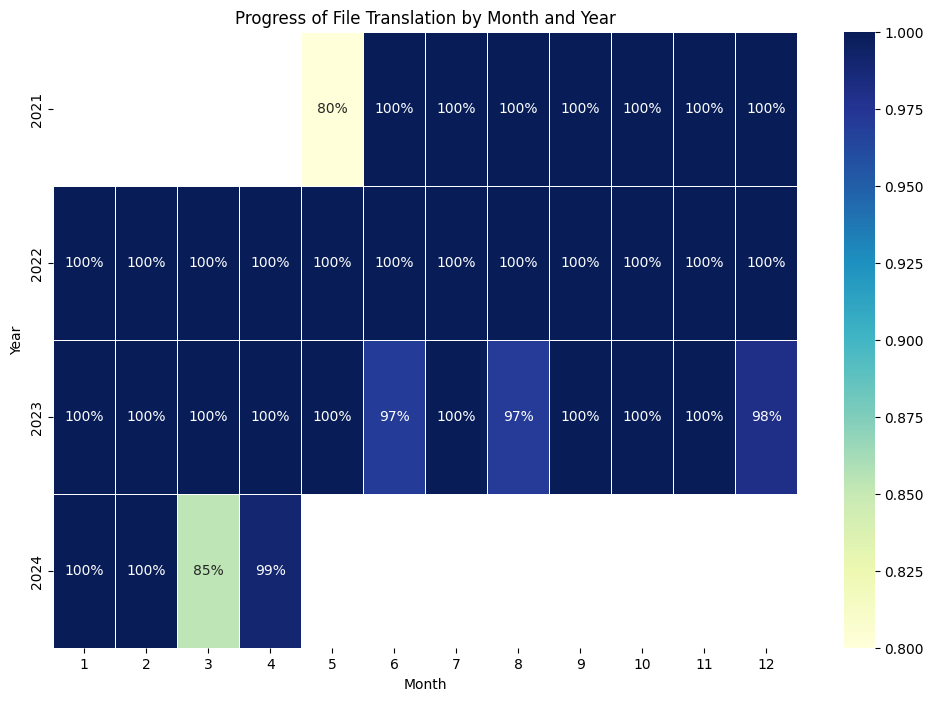

Heatmap displayed successfully.


In [5]:
# Install PyDrive2
!pip install -U -q PyDrive2

# Import necessary libraries
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
print("Google Drive authenticated.")

# Define the function to calculate progress in each folder
def calculate_progress(folder_id):
    try:
        file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()
        total_files = len(file_list)
        translated_files = sum(1 for file in file_list if file['title'].endswith('_t.xlsx'))
        print(f"Processed folder {folder_id}: Total Files {total_files}, Translated Files {translated_files}")
        return translated_files, total_files
    except Exception as e:
        print(f"Error processing folder {folder_id}: {str(e)}")
        return 0, 0

# Main folder ID that contains all monthly folders
main_folder_id = '1Nw3wY1fpsFs-K-KaJpuFWY0kcEDpXzEt'
folders = drive.ListFile({'q': f"'{main_folder_id}' in parents and trashed=false"}).GetList()

# Initialize a DataFrame to store progress data
data = []

# Loop through each folder
for folder in folders:
    try:
        date_range = folder['title'].split('_')
        start_date = datetime.strptime(date_range[0], '%Y%m%d')
        year, month = start_date.year, start_date.month
        translated, total = calculate_progress(folder['id'])
        data.append({'Year': year, 'Month': month, 'Translated': translated, 'Total': total})
        print(f"Added data for folder {folder['title']}: Year {year}, Month {month}, Progress calculated.")
    except Exception as e:
        print(f"Error reading folder {folder['title']}: {str(e)}")

# Convert list to DataFrame
df = pd.DataFrame(data)
df['Progress'] = df['Translated'] / df['Total']

# Pivot the DataFrame for a heatmap
pivot_table = df.pivot(index="Year", columns="Month", values="Progress")

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".0%", linewidths=.5)
plt.title('Progress of File Translation by Month and Year')
plt.show()
print("Heatmap displayed successfully.")


# **Python Translator**

In [ ]:
!pip install openpyxl gspread oauth2client pandas backoff googletrans==4.0.0-rc1

import openpyxl
from googletrans import Translator
import time
import os
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
import backoff
from googleapiclient.errors import HttpError

# Initialize the translator
translator = Translator()
print("Translator initialized.")

# Function to translate text with retries and detailed logging
def translate_text(text, retry=3):
    if not text:
        return "Log: No text to translate, cell was empty."
    for attempt in range(retry):
        try:
            print(f"Translating text... Attempt {attempt + 1}")
            translated_text = translator.translate(text, dest='en').text
            print(f"Success: Text translated on attempt {attempt + 1}")
            return translated_text
        except Exception as e:
            print(f"Error on attempt {attempt + 1}: {str(e)}")
            time.sleep(2 ** attempt)
            if attempt == retry - 1:
                error_message = f"Log: Translation failed after {retry} attempts due to: {str(e)}"
                print(error_message)
                return error_message

# Authenticate and create the service client for Google Drive
auth.authenticate_user()
print("Google authentication successful.")
gdrive_service = build('drive', 'v3')
print("Google Drive service client created.")

# List of Google Drive folder IDs where the files are to be processed
folder_ids = ['1vv2pxIxOs3i4mulkO2nF1oJSh3GtUcDz', '1zruDe_JCqlx5ieIq9QUHjRAbnvSjhGkb', '1bg5RT_vpu2BG6BnjHr8v_K9cKZ8fVSQG', '1kVGwydxD181WjvUnxbdivdKdGkq3b4j4']

# Function to list and sort files in a Google Drive folder
def list_drive_files(folder_id):
    query = f"'{folder_id}' in parents and mimeType='application/vnd.openxmlformats-officedocument.spreadsheetml.sheet'"
    print(f"Querying Google Drive for files in folder {folder_id}...")
    results = gdrive_service.files().list(q=query, fields="files(id, name)").execute()
    files = results.get('files', [])
    print(f"Found {len(files)} files in folder {folder_id}.")
    return files

@backoff.on_exception(backoff.expo, (HttpError, OSError), max_tries=5)  # Handling HTTP and SSL errors with exponential backoff
def update_drive_file(file_id, media_body, new_name):
    print("Attempting to update file on Google Drive...")
    file_metadata = {'name': new_name}
    return gdrive_service.files().update(fileId=file_id, body=file_metadata, media_body=media_body).execute()

# Process files in each specified Google Drive folder
for folder_id in folder_ids:
    files_in_folder = list_drive_files(folder_id)
    files_to_process = [file for file in files_in_folder if not file['name'].endswith('_t.xlsx')]

    for file in files_to_process:
        base_name = os.path.splitext(file['name'])[0]
        new_name = f"{base_name}_t.xlsx"

        print(f"Processing file: {file['name']} for translation.")
        # Download file from Google Drive
        print("Downloading file from Google Drive...")
        downloaded_file = gdrive_service.files().get_media(fileId=file['id']).execute()
        with open(file['name'], 'wb') as f:
            f.write(downloaded_file)
        print("File downloaded successfully.")

        # Load the workbook and the first sheet
        print("Loading workbook...")
        workbook = openpyxl.load_workbook(file['name'])
        sheet = workbook.active
        print(f"Workbook {file['name']} loaded, beginning translation of contents.")

        # Check if 'Text ENG' column exists, if not add it
        if 'Text ENG' not in [cell.value for cell in sheet[1]]:
            sheet.cell(row=1, column=sheet.max_column + 1).value = 'Text ENG'
            eng_col = sheet.max_column
        else:
            eng_col = [cell.value for cell in sheet[1]].index('Text ENG') + 1

        # Translate contents and insert in new column
        max_row = sheet.max_row
        for row in range(2, max_row + 1):
            cell_value = sheet[f"D{row}"].value
            if cell_value is not None:
                processed_text = str(cell_value).strip().replace("\n", " ").replace("\r", " ")
                print(f"Processing cell D{row} for translation...")
                translation_or_log = translate_text(processed_text)
                sheet.cell(row=row, column=eng_col).value = translation_or_log
                print(f"Cell D{row} updated with translation in 'Text ENG'.")
            else:
                print(f"Skipping empty cell D{row}.")

        # Save the translated workbook locally
        print("Saving translated workbook...")
        workbook.save(new_name)
        print(f"File translated and saved locally as {new_name}")

        # Replace the original file with the translated version in Google Drive
        media = MediaFileUpload(new_name, mimetype='application/vnd.openxmlformats-officedocument.spreadsheetml.sheet')
        try:
            updated_file = update_drive_file(file['id'], media, new_name)
            print(f"Replaced the original file with the translated version on Google Drive, renamed to {new_name}.")
        except Exception as e:
            print(f"Failed to update file on Google Drive due to: {str(e)}")

    print(f"Processing complete for folder {folder_id}. All files processed.")

print("All folders processed successfully.")


Translator initialized.
Google authentication successful.
Google Drive service client created.
Querying Google Drive for files in folder 1vv2pxIxOs3i4mulkO2nF1oJSh3GtUcDz...
Found 100 files in folder 1vv2pxIxOs3i4mulkO2nF1oJSh3GtUcDz.
Processing complete for folder 1vv2pxIxOs3i4mulkO2nF1oJSh3GtUcDz. All files processed.
Querying Google Drive for files in folder 1zruDe_JCqlx5ieIq9QUHjRAbnvSjhGkb...
Found 100 files in folder 1zruDe_JCqlx5ieIq9QUHjRAbnvSjhGkb.
Processing complete for folder 1zruDe_JCqlx5ieIq9QUHjRAbnvSjhGkb. All files processed.
Querying Google Drive for files in folder 1bg5RT_vpu2BG6BnjHr8v_K9cKZ8fVSQG...
Found 100 files in folder 1bg5RT_vpu2BG6BnjHr8v_K9cKZ8fVSQG.
Processing complete for folder 1bg5RT_vpu2BG6BnjHr8v_K9cKZ8fVSQG. All files processed.
Querying Google Drive for files in folder 1kVGwydxD181WjvUnxbdivdKdGkq3b4j4...
Found 100 files in folder 1kVGwydxD181WjvUnxbdivdKdGkq3b4j4.
Processing complete for folder 1kVGwydxD181WjvUnxbdivdKdGkq3b4j4. All files processe

In [ ]:
# List of channels added to original mine
channels = ['@myLordBebo',
            '@kalibrated',
            '@warmonitors',
            '@RWApodcast',
            '@nexta_live',
            '@nexta_tv',
            '@csources',
            '@ejshahidenko',
            '@st_javelin',
            '@UAWeapons',
            '@alibekovkz',
            '@sputnikKZ',
            '@zhapisheva',
            '@masamedia',
            '@theastanatimes',
            '@tengrinews',
            '@MargulanSeissembai',
            '@newsnurkz',
            '@atamekenbusiness',
            '@qazaqstantv',
            '@informburo_kz',
            '@kairgram',
            '@YerzhanY',
            '@zakonkz',
            '@kaz_news',
            '@kaz_news_tv',
            '@belpul',
            '@zerkalo_io',
            '@koko_by',
            '@onlinerby',
            '@MirovichMedia',
            '@charter97_org',
            '@belarusian_silovik',
            '@pul_1',
            '@Belarus_VPO',
            '@tsikhanouskaya',
            '@latushka',
            '@off_shores',
            '@zlobtate',
            '@aqorda_resmi',
            '@vlastkz',
            '@nursolovej',
            '@yyedilov',
            '@kaliyevchannel',
            '@kozachkow',
            '@hvatitboyatsya',
            '@vkarbalevich',
            '@kharytonau',
            '@navosha',
            '@peter_kuznetsoff',
            '@Azarenok_TV',
            '@sergechalychannel',
            '@glav_tur',
            '@dzermant',
            '@shpakouski',
            '@shraibman',
            '@yuryvoskresensky',
            '@viktarbabarykaofficial',
            '@makers2fron',
            '@DeepStateUA',
            ]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.3/606.3 kB 8.5 MB/s eta 0:00:00
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Custom TB Handler failed, unregistering


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-6afde0cb81b7>", line 8, in <cell line: 8>
    from telethon.sync import TelegramClient
ModuleNotFoundError: No module named 'telethon'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 248, in wrapped
    return f(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 281, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/usr/lib/python3.10/inspect.py", line 166